In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import keras as keras
from keras.layers import Dropout


import h5py

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (12,6)

In [97]:
df = pd.read_csv('penguins_simple.csv', sep=';')

In [79]:
X = df.iloc[:, 1:5] / 100
y = pd.get_dummies(df['Species'])

X.isnull().sum()

Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

In [80]:
X.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'],
      dtype='object')

In [81]:
X.shape

(333, 4)

In [82]:
trans = ColumnTransformer([
    ('categorial_imputer', MinMaxScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)']),
    ('numeric_imputer', StandardScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'])
])

trans.fit(X)                    
X_t = trans.transform(X) 
X_t

array([[ 0.25454545,  0.66666667,  0.15254237, ...,  0.7807321 ,
        -1.42675157, -0.56847478],
       [ 0.26909091,  0.51190476,  0.23728814, ...,  0.11958397,
        -1.06947358, -0.50628618],
       [ 0.29818182,  0.58333333,  0.38983051, ...,  0.42472926,
        -0.42637319, -1.1903608 ],
       ...,
       [ 0.66545455,  0.30952381,  0.84745763, ..., -0.74499437,
         1.50292796,  1.91906927],
       [ 0.47636364,  0.20238095,  0.6779661 , ..., -1.20271231,
         0.78837197,  1.23499466],
       [ 0.64727273,  0.35714286,  0.69491525, ..., -0.54156417,
         0.85982757,  1.48374906]])

In [83]:
# MNIST: (60000, 28, 28) reshape to (60000, 784)

In [84]:
X_t.shape, y.shape

((333, 8), (333, 3))

#### problem with overfitting -> Dropout layer 
##### Dropout is implemented per-layer in a neural network.

Large neural nets trained on relatively small datasets can overfit the training data.

This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g. a test dataset. Generalization error increases due to overfitting.

One approach to reduce overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble.

#### Note

This model is very small, with few neurons, so a Regularization technique, where neurons are randomly dropped, isn't suggested!


In [184]:
K.clear_session() # reset your model parameters and everything

In [191]:
model = Sequential(
    #[

    #Dense(10, activation='relu', input_shape=(8,)),# hidden
    #Dense(3, activation='softmax') # 3 neurons for 3 categories, softmax for multiclass(multilabel) classification
#]
)
# TODO: try adding a Dropout layer (regularization)
#using Dropout on the visible Layer -> Weird results
#model.add(Dropout(0.2, input_shape=(10,)))
model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dropout(rate=0.50, noise_shape=None, seed=None))
model.add(Dense(3, activation='softmax'))


#
# TODO: try adding a BatchNormalization layer (regularization + speedup)

###### The Dropout layer should be applied after the first Dense and before the last one.


In [185]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(8,)))
model.add(keras.layers.Dropout(rate=0.50, noise_shape=None, seed=None))
model.add(Dense(3, activation='softmax'))

In [186]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# TODO: check how sparse_categorical_crossentropy differs
# TODO: try EarlyStopping (see course material)

In [187]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [188]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss')

In [189]:
history = model.fit(X_t, y, batch_size=32, epochs=100, validation_split=0.3, callbacks=[callback])

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 1.0692 - acc: 0.4813 - val_loss: 1.7889 - val_acc: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0360 - acc: 0.5010 - val_loss: 1.7668 - val_acc: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.9294 - acc: 0.5800 - val_loss: 1.7347 - val_acc: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8724 - acc: 0.6074 - val_loss: 1.7098 - val_acc: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.8658 - acc: 0.6028 - val_loss: 1.6899 - val_acc: 0.0000e+00


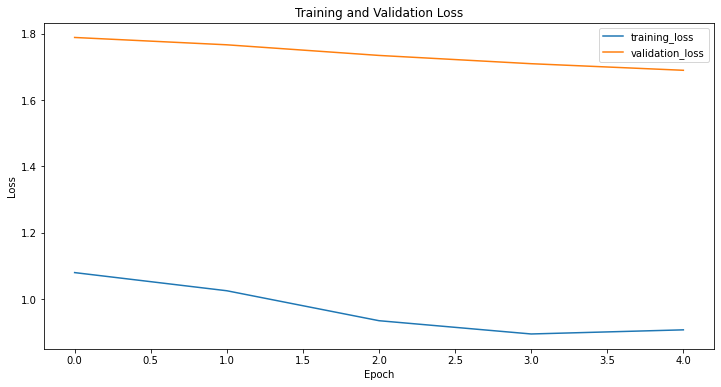

In [190]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

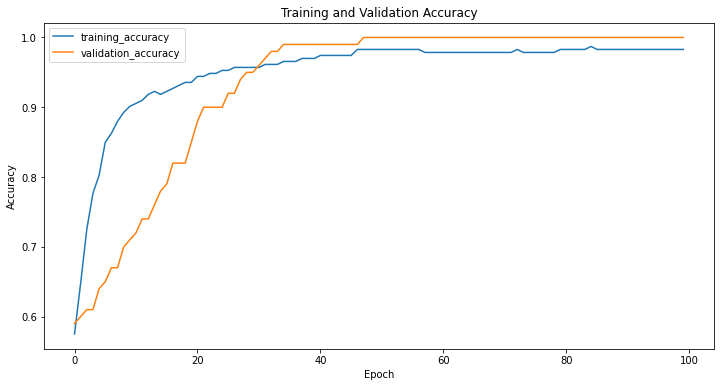

In [91]:
plt.plot(history.history['acc'], label='training_accuracy')
plt.plot(history.history['val_acc'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
# Evaluate the model
model.evaluate(X_t, y, verbose=0)

[0.05212625116109848, 0.9879879951477051]

In [93]:
# Look at the first 10 predictions
model.predict(X_t)[:10]

array([[9.8906660e-01, 9.7355973e-03, 1.1977496e-03],
       [9.6862298e-01, 2.6667371e-02, 4.7096717e-03],
       [9.2736161e-01, 6.8503276e-02, 4.1350815e-03],
       [9.9918324e-01, 6.3772989e-04, 1.7908259e-04],
       [9.9742162e-01, 2.3412388e-03, 2.3704160e-04],
       [9.7865385e-01, 1.8970286e-02, 2.3758628e-03],
       [9.9735093e-01, 1.2974326e-03, 1.3516045e-03],
       [7.0604444e-01, 2.8675923e-01, 7.1963319e-03],
       [9.9936980e-01, 5.3870399e-04, 9.1539805e-05],
       [9.9993336e-01, 3.0984877e-05, 3.5648143e-05]], dtype=float32)

In [95]:
 print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [78]:
keys = history.history.keys()

In [79]:
for key in keys:
    print (key)

loss
acc
val_loss
val_acc


<b> WEIGHTS </b>

In [85]:
model.get_weights()

[array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
         -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
        [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
          0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
        [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
          0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
        [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
          0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
        [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
          0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
        [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
          0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
        [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
         -0.02674877,  0.1730233

In [81]:
# Inspect the weights of the Neural Network
model.get_weights()[0] #input weights

array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
        -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
       [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
         0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
       [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
         0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
       [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
         0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
       [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
         0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
       [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
         0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
       [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
        -0.02674877,  0.17302333,  0.573876  

In [82]:
model.get_weights()[1] #input weights

array([ 0.20176019,  0.24208458, -0.13728085, -0.14883731,  0.3722174 ,
        0.311629  ,  0.0914636 ,  0.16857322,  0.27169004, -0.06238016],
      dtype=float32)

In [83]:
model.get_weights() # output weights

[array([[-0.2021342 , -0.52398956, -0.39456084, -0.03405682,  0.88415927,
         -0.14573385, -0.35100287, -0.12934543,  0.7743712 , -0.2769007 ],
        [-0.1795314 ,  0.28073975,  0.12213817, -0.42209756,  0.2780948 ,
          0.33031613,  0.38943765,  0.10365221,  0.80225134, -0.5053686 ],
        [-0.23064572,  0.8197238 ,  0.41905284, -0.08424684, -0.19763748,
          0.7226037 , -0.07232069,  0.08506066, -0.17006712,  0.29559505],
        [ 0.60055745,  0.46431428, -0.64535975, -0.4719543 , -0.09545835,
          0.1262844 , -0.04551539, -0.12319717,  0.7037154 ,  0.21726388],
        [-0.27170444, -0.81607866, -0.07898765,  0.23190685,  0.5298667 ,
          0.8688656 ,  0.3009411 ,  0.40475565, -0.352946  , -0.0640467 ],
        [ 0.3498691 ,  0.42720047,  0.05672726,  0.03536846, -0.4524389 ,
          0.16529377, -0.60469955, -0.7585782 ,  0.6487256 ,  0.00132135],
        [-0.642278  , -0.05845499,  0.15685424,  0.38728297,  0.40904832,
         -0.02674877,  0.1730233

In [84]:
model.get_weights()[3] # output bias

array([ 0.04626906,  0.12644413, -0.2362276 ], dtype=float32)